# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products, which will help them to create personalised offers for customers against different products


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
test= pd.read_csv('test.csv')
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
#Merge the two files
data= pd.concat([train, test], ignore_index= True) 
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [52]:
gender_count= data.groupby('Gender')['User_ID'].nunique().reset_index(name='counts')
total_count = gender_count['counts'].sum()
gender_count['percent'] =(gender_count['counts']/total_count *100).round(2)
gender_count


,Gender,counts,percent
0,F,1666,28.28
1,M,4225,71.72


##### Observation : The data has a total of 5891 Users, 71.7% male and 28.3% female

In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [8]:
df.drop('User_ID', axis =1, inplace=True)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [102]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [156]:
category = [feat  for feat in df.columns if df[feat].dtype == 'O']
category

['Product_ID', 'Stay_In_Current_City_Years']

####  Missing Values

In [123]:
df.columns[df.isnull().any()].tolist()

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [103]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
product2_na =data[data['Product_Category_2'].isna()]

In [ ]:
product3_na =data[df['Product_Category_3'].isna()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550068,P00128942,1,5,7,2,2,1,1,11.0,16.0,NaN
550069,P00113442,1,3,17,3,0,0,3,5.0,16.0,NaN
550070,P00288442,0,4,1,2,4,1,5,14.0,16.0,NaN
550071,P00145342,0,4,1,2,4,1,4,9.0,16.0,NaN
550072,P00053842,0,3,1,3,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,2,4,1,8,8.0,16.0,NaN
783663,P00254642,0,3,15,2,4,1,5,8.0,16.0,NaN
783664,P00031842,0,3,15,2,4,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,3,4,0,10,16.0,16.0,NaN


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,2,1,1,20,8.0,16.0,368.0
550064,P00375436,0,3,1,3,3,0,20,8.0,16.0,371.0
550065,P00375436,0,3,15,2,4,1,20,8.0,16.0,137.0
550066,P00375436,0,7,1,3,2,0,20,8.0,16.0,365.0


In [133]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [134]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [135]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)

df['Product_Category_2'].value_counts()

Product_Category_2
8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [ ]:
df['Product_Category_3'].unique()

In [ ]:
df['Product_Category_2'].value_count()

In [168]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace =True)

#### Categorical Features

In [152]:
df.groupby('Gender')['Product_ID'].nunique().reset_index()

,Gender,Product_ID
0,0,3445
1,1,3635


In [105]:
#handling categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [127]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'].value_counts()

In [ ]:
df['Age'].hist()

In [131]:
age_map= {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50' : 5, '51-55': 6, '55+': 7}
df['Age'] = df['Age'].map(age_map)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [107]:
df['City_Category'].value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [132]:
df['City_Category'] =df['City_Category'].map({'A' : 1, 'B' : 2, 'C' : 3})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [162]:
df['Stay_In_Current_City_Years'].unique()
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 62.8+ MB


In [164]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
test=df[df['Purchase'].isnull()]
test

In [ ]:
train=df[~df['Purchase'].isnull()]
train

#### Feature scaling

In [188]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [69]:
age_count = df.groupby('Age')['Product_ID'].nunique().reset_index(name='count')
age_count


,Age,count
0,0-17,2530
1,18-25,3325
2,26-35,3486
3,36-45,3402
4,46-50,3223
5,51-55,3033
6,55+,2798


C:\Users\enita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

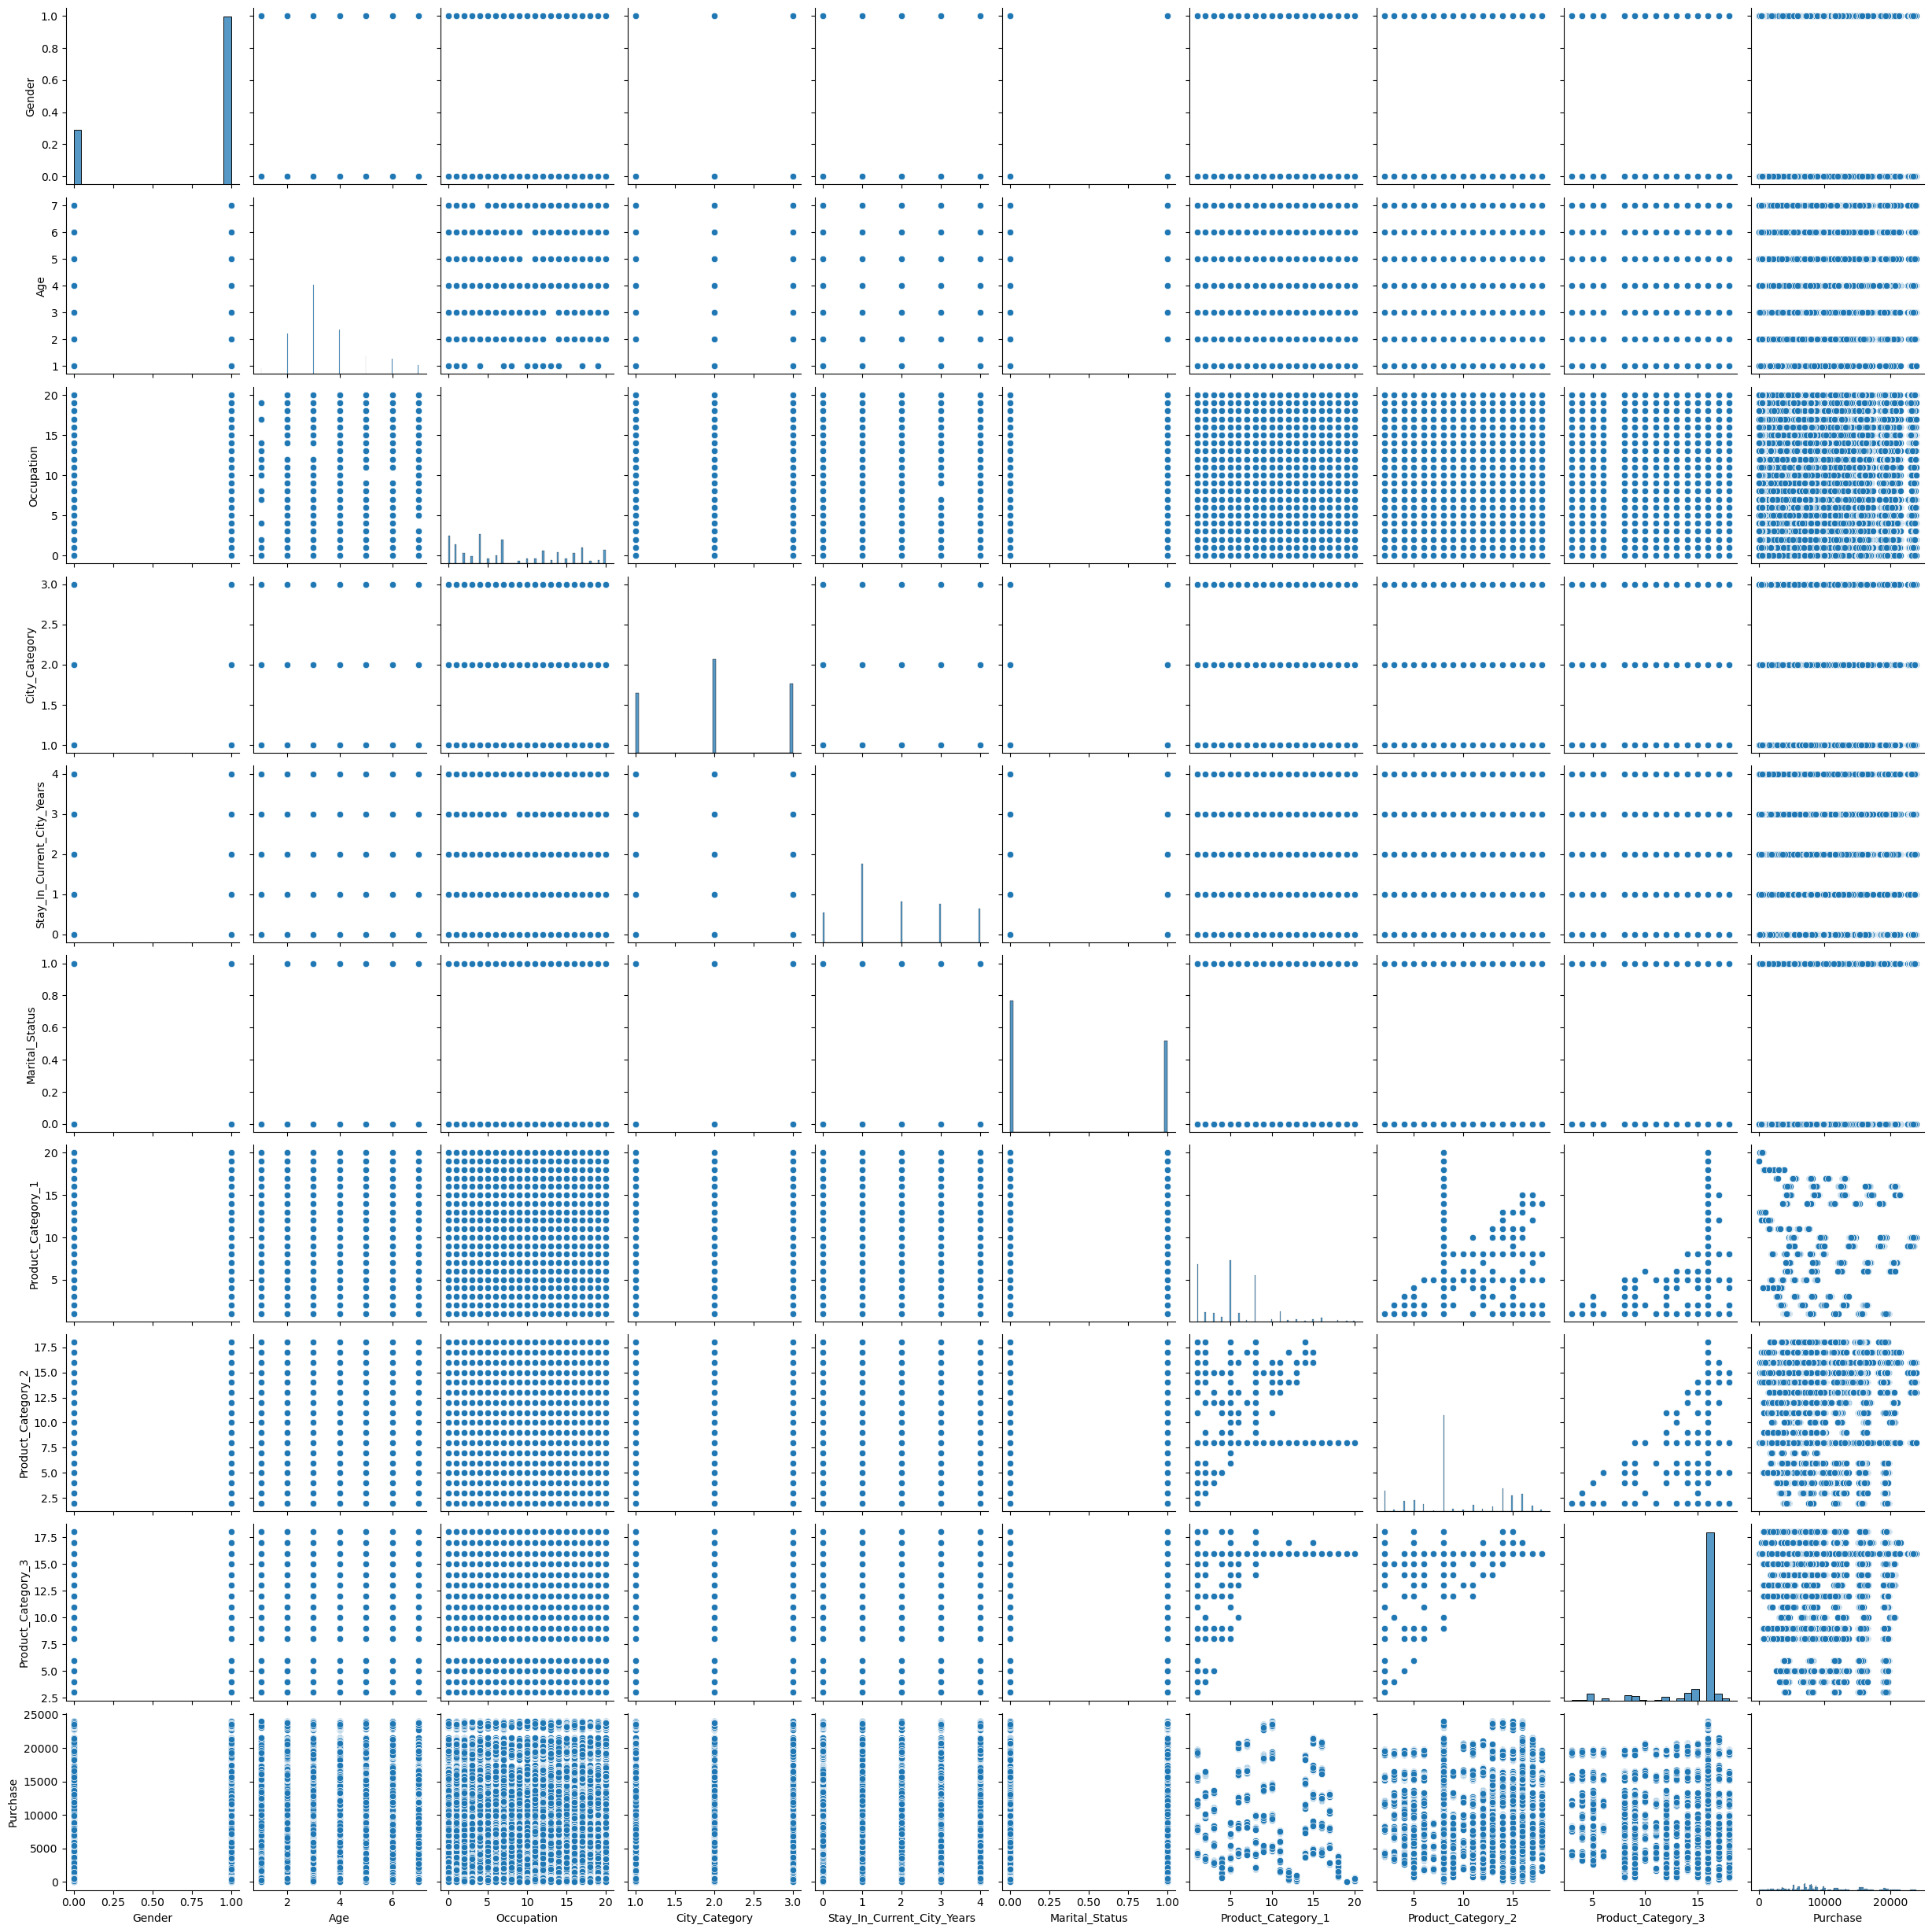

In [169]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

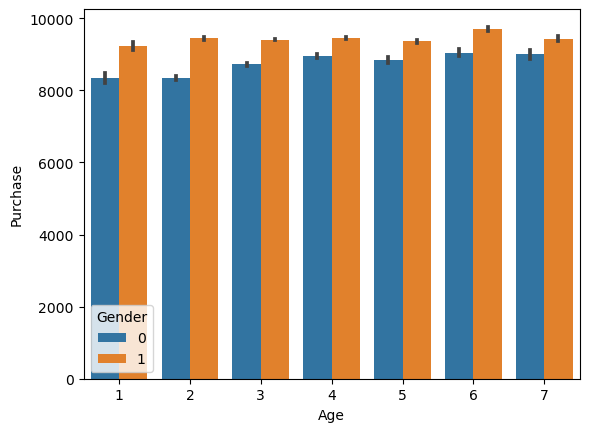

In [171]:
sns.barplot(x='Age', y ='Purchase',data=df, hue ='Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

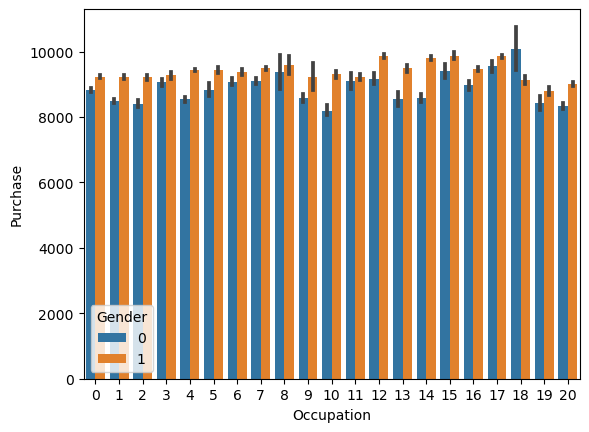

In [173]:
sns.barplot(data=df, x='Occupation',y ='Purchase',  hue ='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

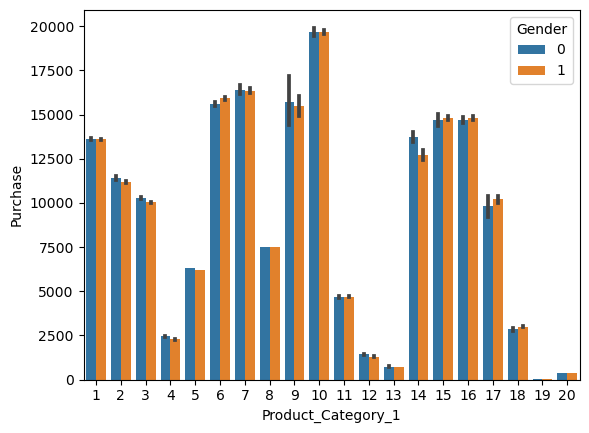

In [175]:
sns.barplot(data=df, x='Product_Category_1',y ='Purchase',  hue ='Gender')

In [85]:
age_product = df.groupby('Age')['Product_ID'].value_counts().reset_index()
age_product

,Age,Product_ID,count
0,0-17,P00255842,85
1,0-17,P00000142,82
2,0-17,P00145042,79
3,0-17,P00289942,79
4,0-17,P00112142,75
...,...,...,...
21792,55+,P00151842,1
21793,55+,P00152942,1
21794,55+,P00153242,1
21795,55+,P00153342,1


In [96]:
df[df['Product_ID'] =='P00151842']

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
72,P00151842,F,18-25,3,B,3,0,4,8.0,9.0,2802.0
3836,P00151842,F,0-17,10,C,4+,0,4,8.0,9.0,2868.0
13136,P00151842,F,26-35,6,C,1,0,4,8.0,9.0,2834.0
37629,P00151842,M,36-45,17,A,1,0,4,8.0,9.0,2856.0
41699,P00151842,M,26-35,17,A,3,0,4,8.0,9.0,2869.0
...,...,...,...,...,...,...,...,...,...,...,...
737646,P00151842,M,18-25,4,A,0,1,4,8.0,9.0,NaN
748288,P00151842,M,26-35,2,B,3,0,4,8.0,9.0,NaN
754158,P00151842,M,51-55,12,B,1,1,4,8.0,9.0,NaN
767483,P00151842,F,36-45,7,B,4+,1,4,8.0,9.0,NaN


In [91]:
 age_purchase = df.groupby('Age')['Purchase'].value_counts().reset_index()
age_purchase
age_purchase['total'] = age_purchase['Purchase'] * age_purchase['count']
age_purchase

,Age,Purchase,count,total
0,0-17,6960.0,11,76560.0
1,0-17,5299.0,10,52990.0
2,0-17,8113.0,10,81130.0
3,0-17,7187.0,10,71870.0
4,0-17,7123.0,10,71230.0
...,...,...,...,...
82791,55+,4366.0,1,4366.0
82792,55+,4365.0,1,4365.0
82793,55+,4362.0,1,4362.0
82794,55+,4360.0,1,4360.0


In [186]:
train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,2,1,1,20,8.0,16.0,368.0
550064,P00375436,0,3,1,3,3,0,20,8.0,16.0,371.0
550065,P00375436,0,3,15,2,4,1,20,8.0,16.0,137.0
550066,P00375436,0,7,1,3,2,0,20,8.0,16.0,365.0


In [ ]:
sns.barplot(x ='Age', y='count', data='age_count')

In [111]:
age_purchase=df.groupby('Age')['Purchase'].value_counts().reset_index()

In [ ]:
age_purchase

,Gender,Product_ID
0,F,3445
1,M,3635


#### Missing Values